In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import re
from matplotlib import gridspec
from IPython.display import HTML
from scipy.stats import gaussian_kde
from scipy.stats import hypergeom

typeface='Helvetica Neue'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22

path='<iframe style="border: 0; width: 400px; height: 439px;" src="https://bandcamp.com/EmbeddedPlayer/album=2862067915/size=large/bgcol=333333/linkcol=e99708/artwork=small/transparent=true/" seamless><a href="http://pulverised.bandcamp.com/album/the-infernal-gospels-of-primitive-devil-worship">The Infernal Gospels Of Primitive Devil Worship by Beastcraft</a></iframe>'

def hpd(data, level):
    """
    Return highest posterior density interval from a list,
    given the percent posterior density interval required.
    """
    d = list(data)
    d.sort()

    nData = len(data)
    nIn = int(round(level * nData))
    if nIn < 2 :
        return None
    #raise RuntimeError("Not enough data. N data: %s"%(len(data)))
 
    i = 0
    r = d[i+nIn-1] - d[i]
    for k in range(len(d) - (nIn - 1)) :
        rk = d[k+nIn-1] - d[k]
        if rk < r :
            r = rk
            i = k

    assert 0 <= i <= i+nIn-1 < len(d)
 
    return (d[i], d[i+nIn-1])

print 'Done!'
HTML(path)

Done!


In [2]:
data={1:{},2:{},3:{}} ## levels of bias

for f in os.listdir('/Users/evogytis/Dropbox/Jupyter_notebooks/MCMC/'):
    #print f
    if '_1' in f:
        idx=1
    elif '_2' in f:
        idx=2
    elif '_3' in f:
        idx=3
        
#     if f.endswith('.2000c.txt'):
#         cerberus=re.match('[A-Z\_a-z]+\_[0-9]+\.([0-9\.]+)\.[0-9]+\.[0-9\.]+r\.2000c.txt',f)
#         indices=set(np.random.choice(xrange(2000),size=2000,replace=False)) ## subsample indices
#         MERS_epi_bias_1.0.5.5.2500r.2000c.txt
#     if f.endswith('.4000c.txt'):
#         indices=set(np.random.choice(xrange(4000),size=3000,replace=False)) ## subsample indices
#         cerberus=re.match('[A-Z\_a-z]+\_[0-9]+\.([0-9\.]+)\.[0-9\.]+r\.4000c.txt',f)
    if f.endswith('.25k.txt'):
        indices=set(np.random.choice(xrange(25000),size=3000,replace=False)) ## subsample indices for the 25k simulations
        cerberus=re.match('[A-Z\_a-z]+\_[0-9]+\.([0-9\.]+)\.25k.txt',f)
        
        r=cerberus.group(1)
        data[idx][r]=[]
        print f,r
        counter=0
        for line in open('/Users/evogytis/Dropbox/Jupyter_notebooks/MCMC/'+f,'r'):
            if len(set([counter])&indices)==1:
                l=line.strip('\n').split('\t')
                #print l
                cases,sequences=l
                cases=map(int,cases[1:-1].split(','))
                sequences=map(int,sequences[1:-1].split(','))

                data[idx][r].append((cases,sequences))
                
            counter+=1

MERS_epi_bias_1.0.5.25k.txt 0.5
MERS_epi_bias_1.0.505.25k.txt 0.505
MERS_epi_bias_1.0.51.25k.txt 0.51
MERS_epi_bias_1.0.515.25k.txt 0.515
MERS_epi_bias_1.0.52.25k.txt 0.52
MERS_epi_bias_1.0.525.25k.txt 0.525
MERS_epi_bias_1.0.53.25k.txt 0.53
MERS_epi_bias_1.0.535.25k.txt 0.535
MERS_epi_bias_1.0.54.25k.txt 0.54
MERS_epi_bias_1.0.545.25k.txt 0.545
MERS_epi_bias_1.0.55.25k.txt 0.55
MERS_epi_bias_1.0.555.25k.txt 0.555
MERS_epi_bias_1.0.56.25k.txt 0.56
MERS_epi_bias_1.0.565.25k.txt 0.565
MERS_epi_bias_1.0.57.25k.txt 0.57
MERS_epi_bias_1.0.575.25k.txt 0.575
MERS_epi_bias_1.0.58.25k.txt 0.58
MERS_epi_bias_1.0.585.25k.txt 0.585
MERS_epi_bias_1.0.59.25k.txt 0.59
MERS_epi_bias_1.0.595.25k.txt 0.595
MERS_epi_bias_1.0.6.25k.txt 0.6
MERS_epi_bias_1.0.605.25k.txt 0.605
MERS_epi_bias_1.0.61.25k.txt 0.61
MERS_epi_bias_1.0.615.25k.txt 0.615
MERS_epi_bias_1.0.62.25k.txt 0.62
MERS_epi_bias_1.0.625.25k.txt 0.625
MERS_epi_bias_1.0.63.25k.txt 0.63
MERS_epi_bias_1.0.635.25k.txt 0.635
MERS_epi_bias_1.0.64.25k

In [3]:
log_path='/Users/evogytis/Documents/MERS_2.0/clean/analyses/beast/coal/MERS_274_sCoal.clusterStats'

for line in open(log_path,'r'):
    l=line.strip('\n').split('\t')
    if l[0]!='state':
        for idx in header.keys():
            posts[idx].append(float(l[header[idx]]))
    else:
        header={x:i for i,x in enumerate(l)}
        posts={x:[] for x in l}
hpds={}        
for idx in header.keys():
    hpds[idx]=hpd(posts[idx],0.95)

print hpds
sl,su=hpds['std cluster size']
ml,mu=hpds['mean cluster size']
ll,lu=hpds['N clusters']

x_grid=np.linspace(0,10,100)
y_grid=np.linspace(0,30,100)

X,Y=np.meshgrid(x_grid,y_grid)
positions = np.vstack([Y.ravel(), X.ravel()])

vals1=posts['mean cluster size']
vals2=posts['std cluster size']
values = np.vstack([vals1, vals2])
kernel = gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

matches={idx:{r:[] for r in data[idx].keys()} for idx in data.keys()}
mismatches={idx:{r:[] for r in data[idx].keys()} for idx in data.keys()}

norm=mpl.colors.Normalize(0.5,1.1)
for idx in data.keys():

    for r in data[idx].keys():
        cs=[x[0] for x in data[idx][r]]
        ss=[filter(lambda w:w!=0,x[1]) for x in data[idx][r]]

        stds=map(np.std,ss)
        mus=map(np.mean,ss)
        meds=map(np.median,ss)
        lens=map(len,ss)
        
        clens=map(len,cs) ## intros
        
        ms=filter(lambda q:sl<stds[q]<=su and ml<mus[q]<=mu and ll<lens[q]<=lu and meds[q]==1,[i for i,x in enumerate(zip(stds,mus,meds,lens,clens))]) ## medians
#         ms=filter(lambda q:sl<stds[q]<=su and ml<mus[q]<=mu and ll<lens[q]<=lu,[i for i,x in enumerate(zip(stds,mus,lens,clens))]) ## no medians
        
        for i in range(len(stds)):
            if i in ms:
                matches[idx][r].append((stds[i],mus[i],lens[i],clens[i]))
            else:
                mismatches[idx][r].append((stds[i],mus[i],lens[i],clens[i]))
        print r

{'std cluster size': (4.87203577268, 6.07462275921), 'N clusters': (47.0, 60.0), 'state': (0.0, 665120000.0), 'median cluster size': (1.0, 1.0), 'mean cluster size': (2.9, 3.70212765957)}
0.745
0.965
0.585
0.915
1.015
0.515
0.845
0.695
0.5
1.005
1.01
0.735
0.59
0.58
0.51
0.53
0.52
0.55
0.54
0.57
0.56
0.995
1.03
1.02
1.05
1.04
1.07
0.505
1.09
0.855
1.06
0.625
1.095
1.08
0.645
1.035
0.725
0.905
0.985
0.535
0.825
0.635
1.085
0.98
0.655
1.025
0.935
0.96
0.525
0.835
0.925
0.665
0.885
1.055
0.805
1.1
0.795
0.82
0.83
0.715
0.81
0.86
0.87
0.84
0.85
0.555
0.88
0.89
0.775
0.955
0.675
0.895
1.045
0.815
0.785
0.99
0.705
0.95
0.94
0.97
0.545
0.91
0.93
0.92
0.9
0.8
0.765
1.0
1.075
0.945
0.605
0.7
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.865
0.575
0.755
0.975
0.595
0.615
0.73
0.72
0.71
0.77
0.76
0.75
0.74
1.065
0.79
0.78
0.565
0.875
0.685
0.745
0.965
0.585
0.915
1.015
0.515
0.845
0.695
0.5
1.005
1.01
0.735
0.59
0.58
0.51
0.53
0.52
0.55
0.54
0.57
0.56
0.995
1.03
1.02
1.05
1.04
1.07
0.505
1.0

1 121
R0 percentiles: (0.72,1.00) median: 0.84 mean: 0.84 supporting sims: 2325
introductions percentiles: (251,435) median: 339 mean: 339.00 supporting sims: 2325
2 121
R0 percentiles: (0.60,0.86) median: 0.72 mean: 0.73 supporting sims: 8757
introductions percentiles: (426,725) median: 561 mean: 566.03 supporting sims: 8757
3 121
R0 percentiles: (0.55,0.82) median: 0.68 mean: 0.68 supporting sims: 7308
introductions percentiles: (487,860) median: 659 mean: 662.76 supporting sims: 7308
model averaged: 0.72 (0.57-0.91) 575.77 (299.00-818.00)


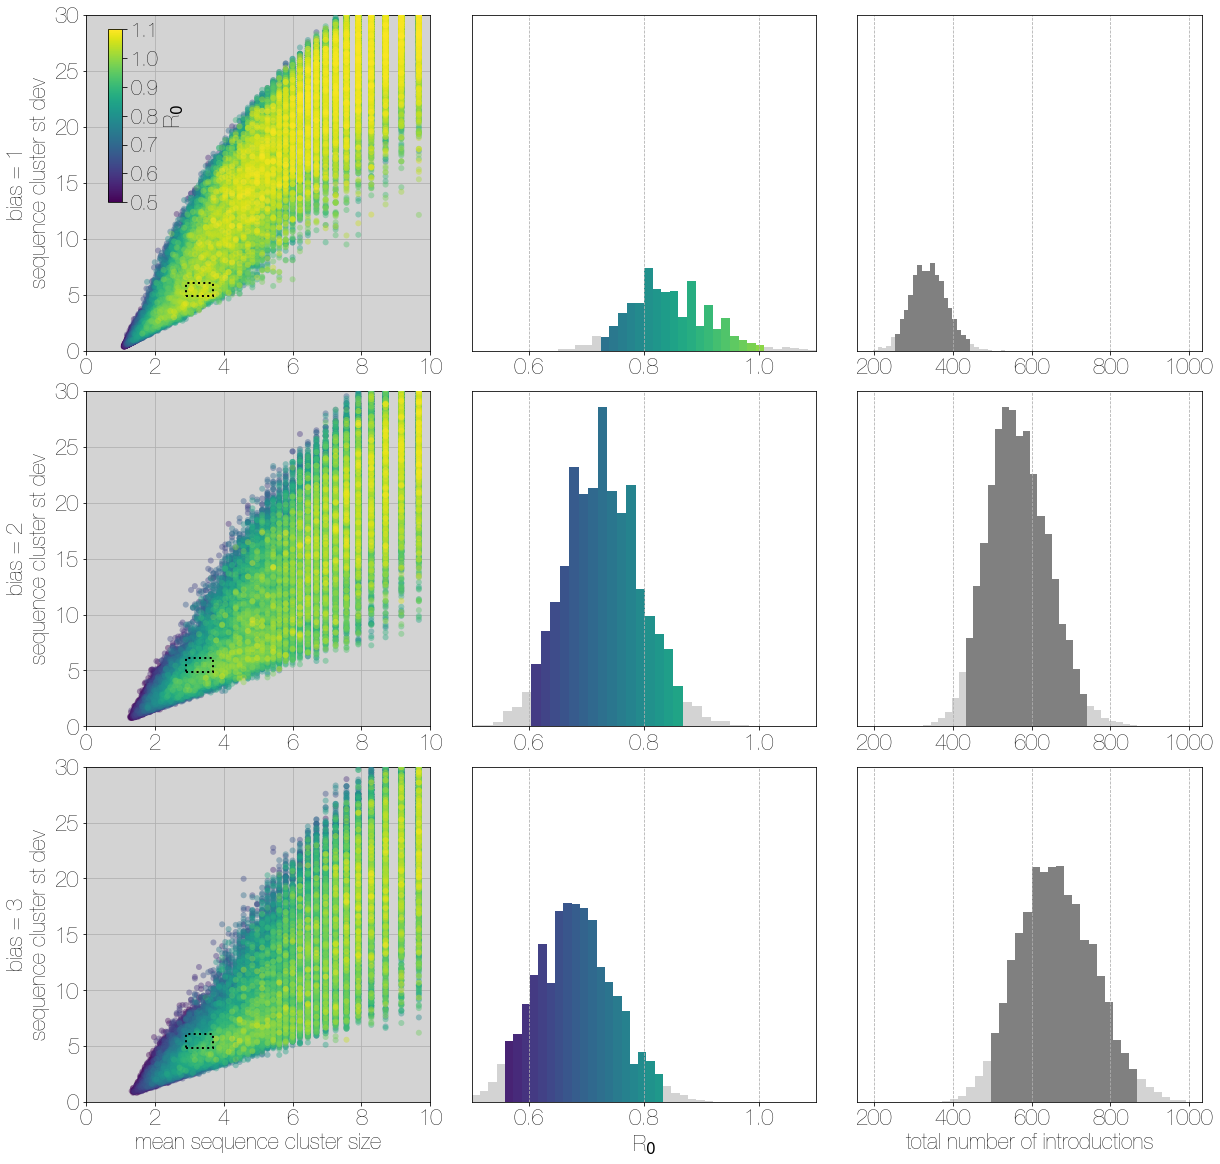

In [4]:
fig = plt.figure(figsize=(20,20),facecolor='w')
gs = gridspec.GridSpec(3, 3,width_ratios=[1,1,1],hspace=0.12,wspace=0.12)

ax1=plt.subplot(gs[0,0])
ax1.set_facecolor('lightgrey')
ax2=plt.subplot(gs[0,1])
ax3=plt.subplot(gs[0,2])

bx1=plt.subplot(gs[1,0],sharex=ax1)
bx1.set_facecolor('lightgrey')
bx2=plt.subplot(gs[1,1],sharex=ax2,sharey=ax2)
bx3=plt.subplot(gs[1,2],sharex=ax3,sharey=ax3)

cx1=plt.subplot(gs[2,0],sharex=ax1)
cx1.set_facecolor('lightgrey')
cx2=plt.subplot(gs[2,1],sharex=ax2,sharey=ax2)
cx3=plt.subplot(gs[2,2],sharex=ax3,sharey=ax3)

for idx in sorted(data.keys()):
    print idx,len(data[idx])
    if idx==1:
        zx1,zx2,zx3=ax1,ax2,ax3
    elif idx==2:
        zx1,zx2,zx3=bx1,bx2,bx3
    else:
        zx1,zx2,zx3=cx1,cx2,cx3
        
    intros=[]
    
    sl,su=hpds['std cluster size']
    ml,mu=hpds['mean cluster size']
    
    match_rectangle=plt.Rectangle((ml,sl),mu-ml,su-sl,facecolor='none',edgecolor='k',lw=2,ls=':',zorder=10000)
    zx1.add_patch(match_rectangle)
    
    cmap=mpl.cm.viridis
    
    R0s=[]
    for r in matches[idx].keys():
        
        xs=[x[1] for x in matches[idx][r]] ## mus
        ys=[x[0] for x in matches[idx][r]] ## stdevs
        intros+=[x[-1] for x in matches[idx][r]] ## intros
        
        zx1.scatter(xs,ys,facecolor=cmap(norm(float(r))),edgecolor='none',alpha=0.4,
                  zorder=int(float(r)*1000))
        R0s+=[float(r) for x in xs] ## store R0 values
    
    lc,uc=np.percentile(R0s,[2.5,97.5])
    n,bins,patches=zx2.hist(R0s,bins=30,facecolor='grey')
    
    print 'R0 percentiles: (%.2f,%.2f) median: %.2f mean: %.2f supporting sims: %d'%(lc,uc,np.median(R0s),np.mean(R0s),sum(n))
    
    for b,p in zip(bins,patches):
        if b<lc or b>uc:
            p.set_facecolor('lightgrey')
        else:
            p.set_facecolor(cmap(norm(b)))
    
    li,ui=np.percentile(intros,[2.5,97.5])
    n,bins,patches=zx3.hist(intros,bins=30,facecolor='grey')
    
    print 'introductions percentiles: (%d,%d) median: %d mean: %.2f supporting sims: %d'%(li,ui,np.median(intros),np.mean(intros),sum(n))
    
    
    for b,p in zip(bins,patches):
        if b<li or b>ui:
            p.set_facecolor('lightgrey')
            
    for r in mismatches[idx].keys():
        xs=[x[1] for x in mismatches[idx][r]]
        ys=[x[0] for x in mismatches[idx][r]]
        zx1.scatter(xs,ys,facecolor=cmap(norm(float(r))),edgecolor='none',alpha=0.4,
                   zorder=int(float(r)*1000))
        
    zx1.set_xlim(0,10)
    zx1.set_ylim(0,30)
    
    zx2.set_xlim(0.5,1.1)
    
    zx1.grid()
    zx2.grid(axis='x',ls='--')
    zx3.grid(axis='x',ls='--')
    
    zx1.set_ylabel('bias = %d\nsequence cluster st dev'%(idx))
    
    if idx==3:
        zx1.set_xlabel('mean sequence cluster size')
        zx2.set_xlabel('R$_{0}$')
        zx3.set_xlabel('total number of introductions')
    
    zx2.set_yticklabels([])
    zx3.set_yticklabels([])
    
    zx2.tick_params(axis='y',size=0)
    zx3.tick_params(axis='y',size=0)

    
    
averaged_R0=[]
averaged_intros=[]

for idx in sorted(data.keys()):   
    for r in matches[idx].keys():
        xs=[x[1] for x in matches[idx][r]] ## mus

        averaged_intros+=[x[-1] for x in matches[idx][r]] ## intros
        averaged_R0+=[float(r) for x in xs]

rl,ru=np.percentile(averaged_R0,[2.5,97.5])
il,iu=np.percentile(averaged_intros,[2.5,97.5])
print 'model averaged: %.2f (%.2f-%.2f) %.2f (%.2f-%.2f)'%(np.mean(averaged_R0),rl,ru,np.mean(averaged_intros),il,iu)

cb = fig.add_axes([0.14, 0.75, 0.01, 0.12])
mpl.colorbar.ColorbarBase(cb, cmap=cmap,ticks=np.linspace(0.5,1.1,7),norm=norm)
cb.tick_params(size=5,labelsize=20)
cb.set_ylabel('R$_{0}$')
# plt.savefig('/Users/evogytis/Documents/structured-mers/figures/mers_epi.png',dpi=300,bbox_inches='tight') ## save to file
# plt.savefig('/Users/evogytis/Documents/structured-mers/figures/mers_epi_4000c.png',dpi=300,bbox_inches='tight')
#plt.savefig('/Users/evogytis/Documents/structured-mers/figures/mers_epi.pdf',dpi=300,bbox_inches='tight')
plt.show()

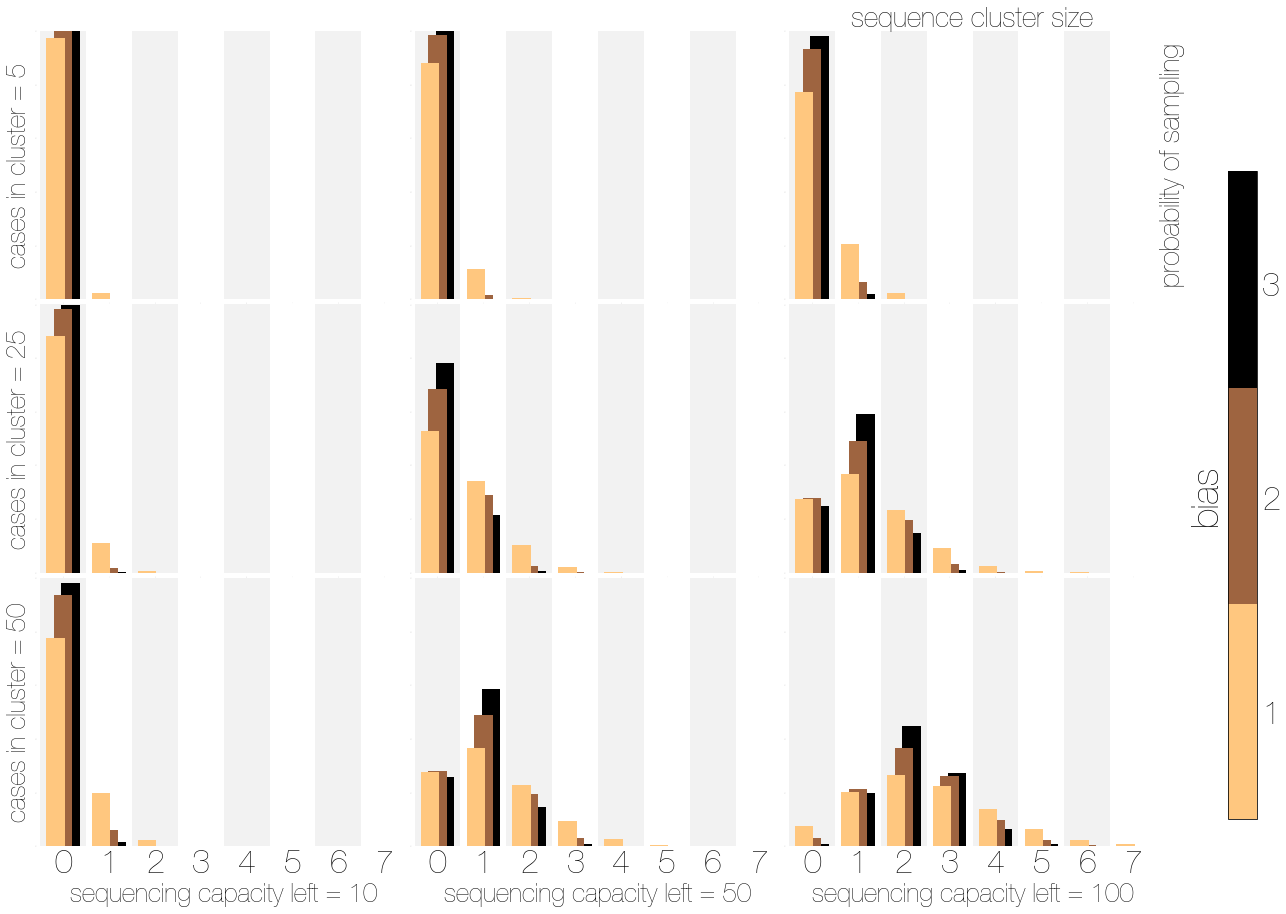

In [5]:
total=2000
biases=[1,2,3]
caseClusterSizes=[5,25,50] ## successes
sequencesAvailable=[10,50,100] ## sequencing capacity left

fig = plt.figure(figsize=(20,15),facecolor='w')
gs = gridspec.GridSpec(len(caseClusterSizes), len(sequencesAvailable),hspace=0.02,wspace=0.02)

cmap=mpl.cm.copper_r
bounds=[1,2,3,4]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

for i,S in enumerate(caseClusterSizes):
    for j,T in enumerate(sequencesAvailable):
        ax=plt.subplot(gs[i,j])
        
        
        rv = hypergeom(total, S, T)
        C = np.arange(0, 8)
        
        hmap=np.zeros((len(biases),len(C)))
        
        for y,bias in enumerate(biases):
            hgm_pmf = rv.pmf(C)
            hgm_pmf=np.power(hgm_pmf,bias)
            hgm_pmf=hgm_pmf/hgm_pmf.sum()

            for p,prob in enumerate(hgm_pmf):
                hmap[y][p]=hgm_pmf[p]

            ax.bar([x+(y-1)/6.0 for x in C],hgm_pmf,facecolor=cmap(norm(bias)),edgecolor='none',align='center',zorder=5-bias,width=0.4)

        ax.set_xticks(C)

        ax.set_xticklabels(C)
        
        if j==0:
            ax.set_ylabel('cases in cluster = %d'%(S),size=26)
            ax.tick_params(axis='y',labelsize=32)
        else:
            ax.tick_params(axis='y',labelsize=0)
            
        if i==len(caseClusterSizes)-1:
            ax.set_xlabel('sequencing capacity left = %d'%(T),size=26)
            ax.tick_params(axis='x',labelsize=32)
        else:
            ax.tick_params(axis='x',labelsize=0)
            
        if i==0 and j==len(sequencesAvailable)-1:
            ax.xaxis.set_label_position('top')
            ax.yaxis.set_label_position('right')
            
            ax.set_xlabel('sequence cluster size',size=28)
            ax.set_ylabel('probability of sampling',size=28)
            
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        
        ax.tick_params(size=0)
        ax.tick_params(axis='y',labelsize=0)
        
        ax.set_ylim(0,1)
        ax.set_xlim(min(C)-0.5,max(C)+0.5)

        [ax.axvspan(x-0.5,x+0.5,facecolor='k',edgecolor='none',alpha=0.05) for x in range(0,len(C),2)]
        
axcb = fig.add_axes([0.95, 0.15, 0.02, 0.6], frame_on=False)
cb=mpl.colorbar.ColorbarBase(axcb,cmap=cmap,norm=norm,orientation='vertical',alpha=1.0)

axcb.yaxis.set_ticks(np.linspace(0.165,0.825,3))
axcb.yaxis.set_ticklabels(biases)
axcb.yaxis.set_label_position("left")
axcb.tick_params(axis='y',which='both',direction='out',size=0,labelsize=32,width=1,pad=5)

axcb.set_ylabel('bias',{'fontsize':38})

plt.show()